In [1]:
# https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis
# https://www.kaggle.com/code/dgawlik/house-prices-eda
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description

In [95]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
train = pd.read_csv('./data/tutoEDA/train.csv')
len(train)

1460

## Data types

In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
target = 'SalePrice'

In [7]:
# extract int and floats
quantitative_var = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative_var.remove('SalePrice')
quantitative_var.remove('Id')
len(quantitative_var)

36

In [8]:
# extract strings
categorical_var = [f for f in train.columns if train.dtypes[f] == 'object']
len(categorical_var)

43

## Basic description of data

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Plot number of missing values

<AxesSubplot:>

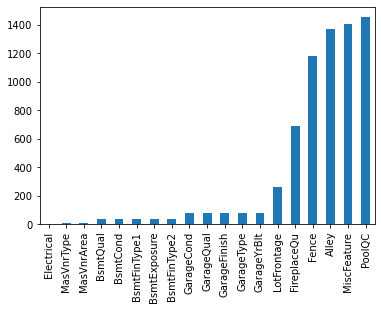

In [11]:
missing = train.isnull().sum() # isnull checks for Nans
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

## Look at target

In [12]:
y = train['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

<AxesSubplot:title={'center':'Normal'}, xlabel='SalePrice'>

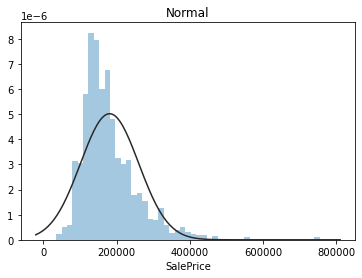

In [15]:
# fit a normal distribution and plot 
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)

In [ ]:
# normality test

stat, p = stats.shapiro(y)
print(p) # rejected, not gaussian

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

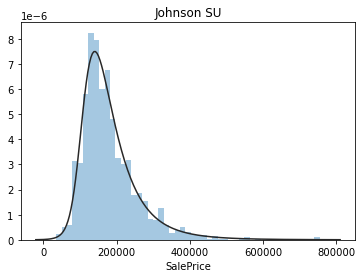

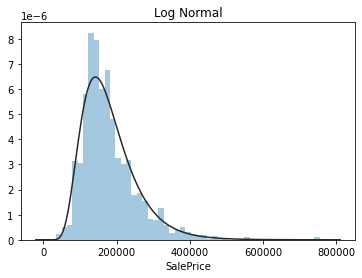

In [16]:
# Transformation 

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

## Check normality of quantitative variables

In [17]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.05
normal_hyp_rejected = pd.DataFrame(train[quantitative_var])
normal_hyp_rejected = normal_hyp_rejected.apply(test_normality)
normal_hyp_rejected # none are gaussian

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
BsmtFinSF1       True
BsmtFinSF2       True
BsmtUnfSF        True
TotalBsmtSF      True
1stFlrSF         True
2ndFlrSF         True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
BsmtHalfBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
KitchenAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
dtype: bool

In [18]:
f = pd.melt(train, value_vars=quantitative_var) # from 
f

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
...,...,...
52555,YrSold,2007.0
52556,YrSold,2010.0
52557,YrSold,2010.0
52558,YrSold,2010.0


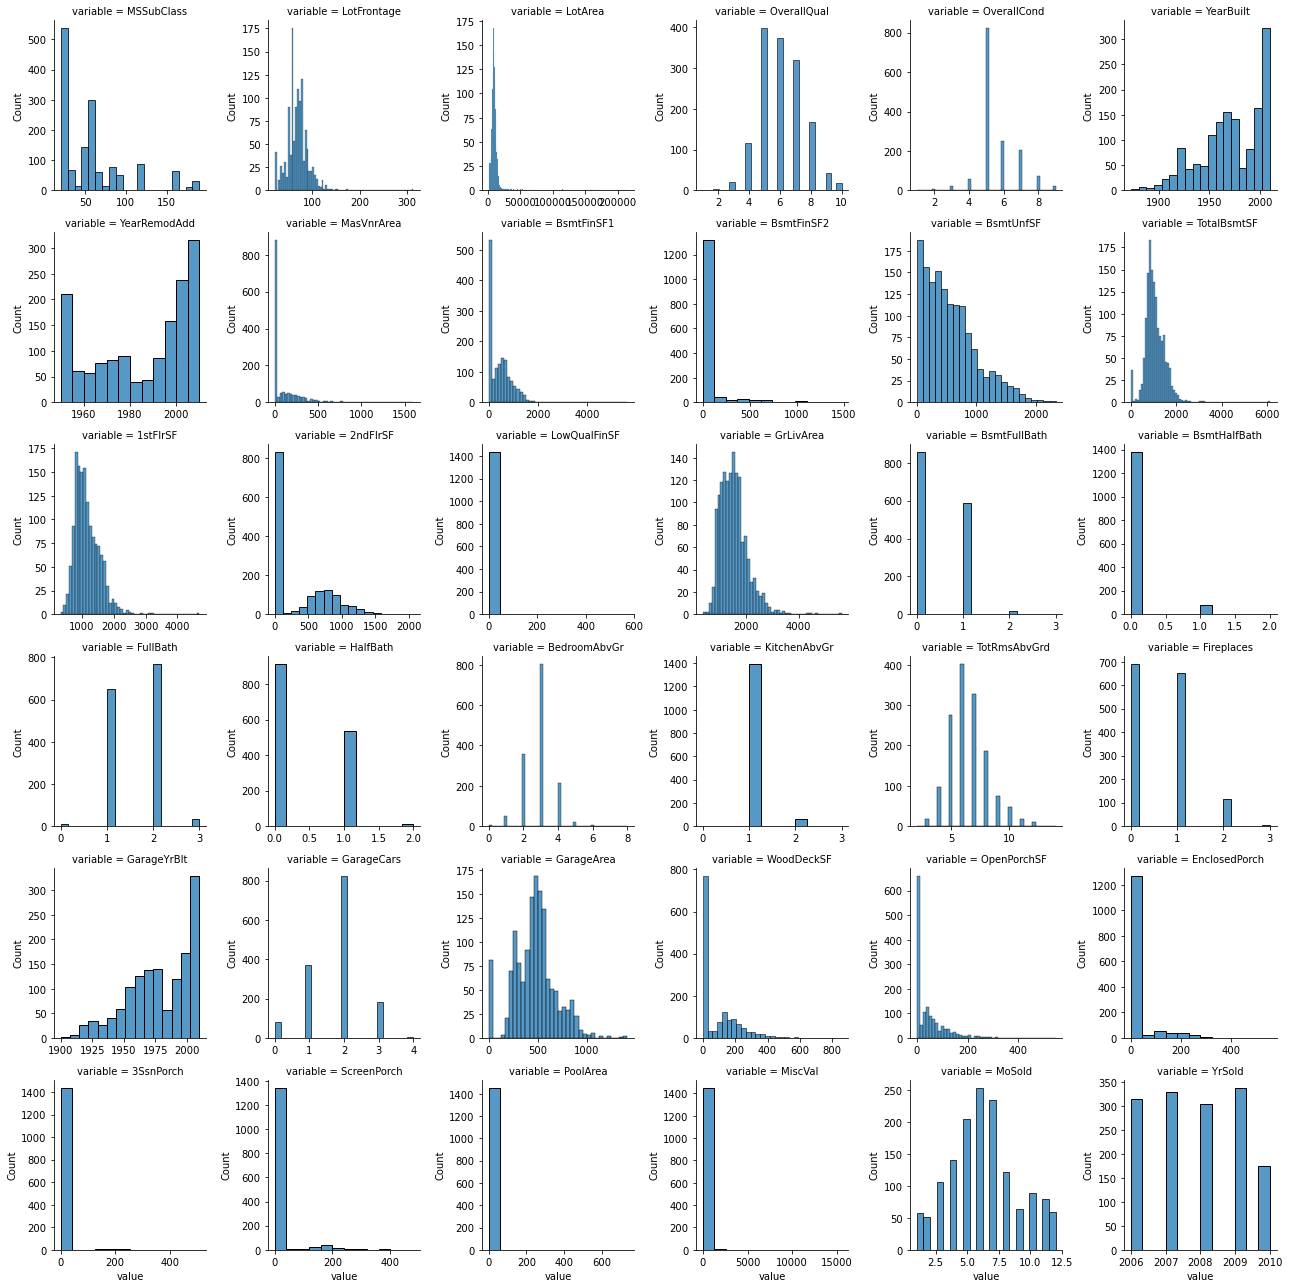

In [19]:
g = sns.FacetGrid(f, col="variable",  col_wrap=6, sharex=False, sharey=False) #creates empty subplots
g = g.map(sns.histplot, "value") # fills in (or sns.distplot)

## Categorical data

In [24]:
# Method 1: check distribution of sale price with respect to variable value

In [23]:
for c in categorical_var:
    train[c] = train[c].astype('category') # change type 'object' to 'category'
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING']) # change name to this so that we can see them on boxplot
        train[c] = train[c].fillna('MISSING')

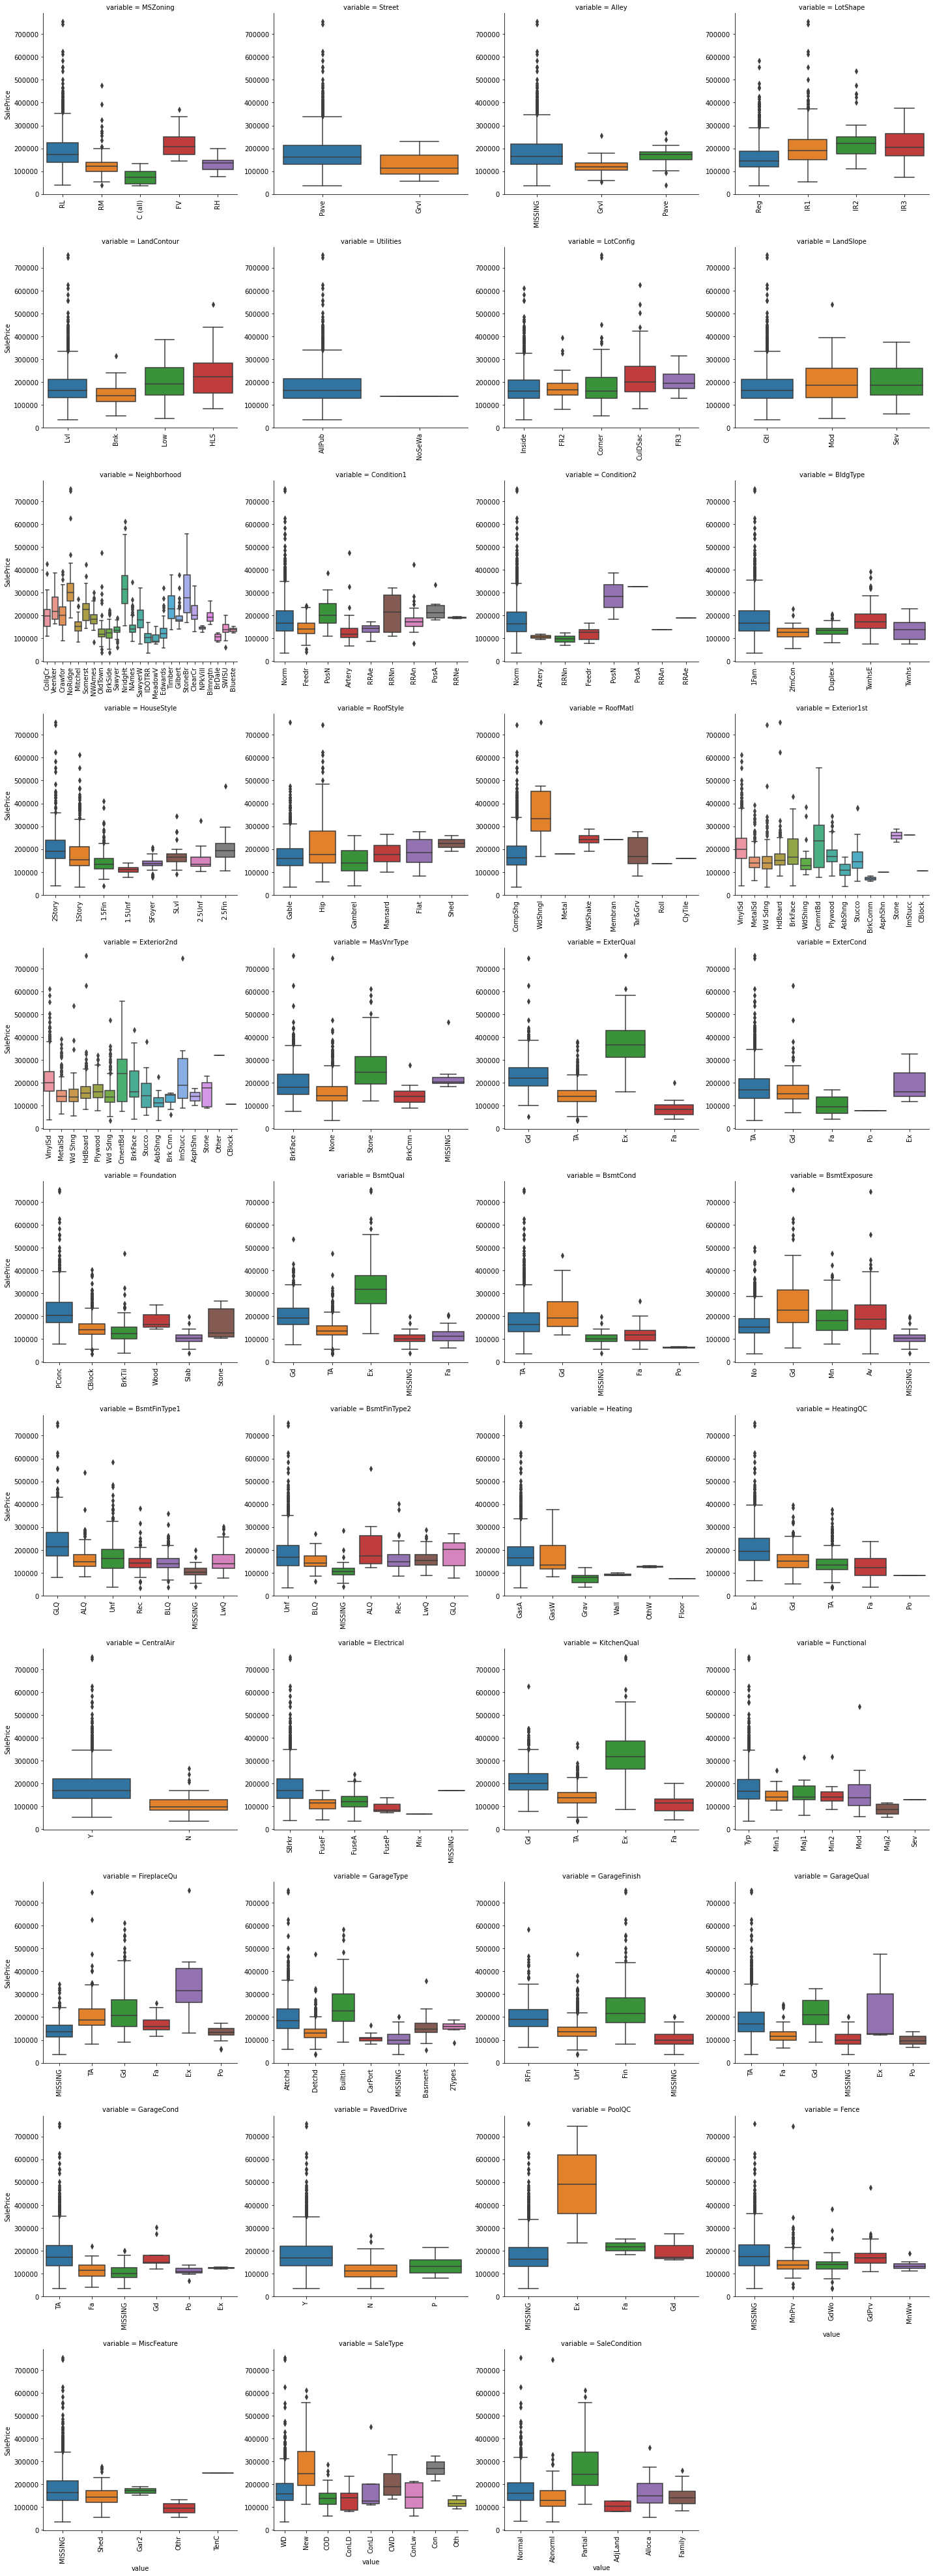

In [22]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=categorical_var)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, size=4)
g = g.map(boxplot, "value", "SalePrice")

In [25]:
# Some categoroes are more diverse with respect to SalePrice. Ex. Neighboorhood has a big impact.
# Most expensive: partial sale condition
# Having a pool improves price a lot

In [30]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = categorical_var
    pvals = []
    for c in categorical_var:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a.head()

,feature,pval
8,Neighborhood,1.558600e-225
18,ExterQual,1.439551e-204
21,BsmtQual,8.158548e-196
30,KitchenQual,3.032213e-192
34,GarageFinish,6.228747e-115


In [33]:
# the smaller the pvalue, the bigger the difference between the groups (call it disparity here)
# just a quick estimation

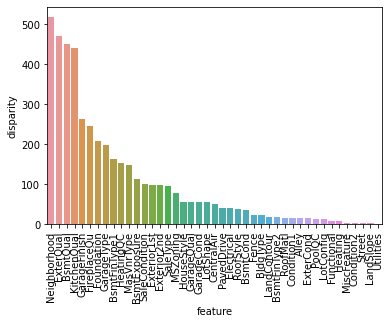

In [34]:
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [100]:
# Method 2: dummy variables
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_E'] = o
    
cat_var_encoded = []
for q in categorical_var:  
    encode(train, q)
    cat_var_encoded.append(q+'_E')
print(cat_var_encoded)

['MSZoning_E', 'Street_E', 'Alley_E', 'LotShape_E', 'LandContour_E', 'Utilities_E', 'LotConfig_E', 'LandSlope_E', 'Neighborhood_E', 'Condition1_E', 'Condition2_E', 'BldgType_E', 'HouseStyle_E', 'RoofStyle_E', 'RoofMatl_E', 'Exterior1st_E', 'Exterior2nd_E', 'MasVnrType_E', 'ExterQual_E', 'ExterCond_E', 'Foundation_E', 'BsmtQual_E', 'BsmtCond_E', 'BsmtExposure_E', 'BsmtFinType1_E', 'BsmtFinType2_E', 'Heating_E', 'HeatingQC_E', 'CentralAir_E', 'Electrical_E', 'KitchenQual_E', 'Functional_E', 'FireplaceQu_E', 'GarageType_E', 'GarageFinish_E', 'GarageQual_E', 'GarageCond_E', 'PavedDrive_E', 'PoolQC_E', 'Fence_E', 'MiscFeature_E', 'SaleType_E', 'SaleCondition_E']


In [101]:
train['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1455    NaN
1456    NaN
1457    NaN
1458    NaN
1459    NaN
Name: PoolQC, Length: 1460, dtype: object

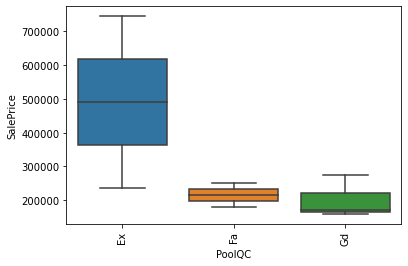

In [102]:
sns.boxplot(x = train['PoolQC'], y = train['SalePrice'])
x=plt.xticks(rotation=90)

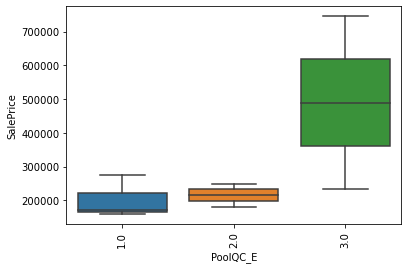

In [103]:
sns.boxplot(x = train['PoolQC_E'], y = train['SalePrice'])
x=plt.xticks(rotation=90)

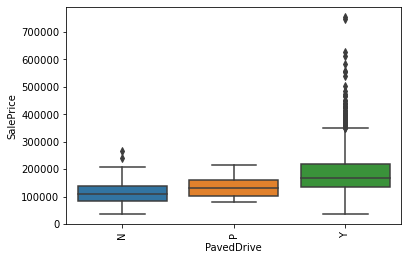

In [46]:
sns.boxplot(x = train['PavedDrive'], y = train['SalePrice'])
x=plt.xticks(rotation=90)

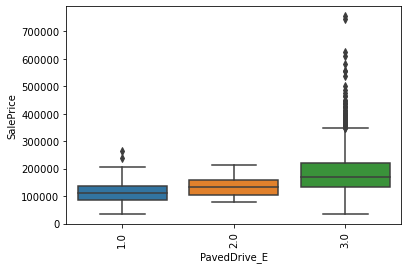

In [47]:
sns.boxplot(x = train['PavedDrive_E'], y = train['SalePrice'])
x=plt.xticks(rotation=90)

In [45]:
# Now qualitative variables get encoded according to ordering based on mean of SalePrice.

### Correlations

In [48]:
# Generally to reduce confunding only variables uncorrelated with each other should be added to regression models (which are correlated with SalePrice).

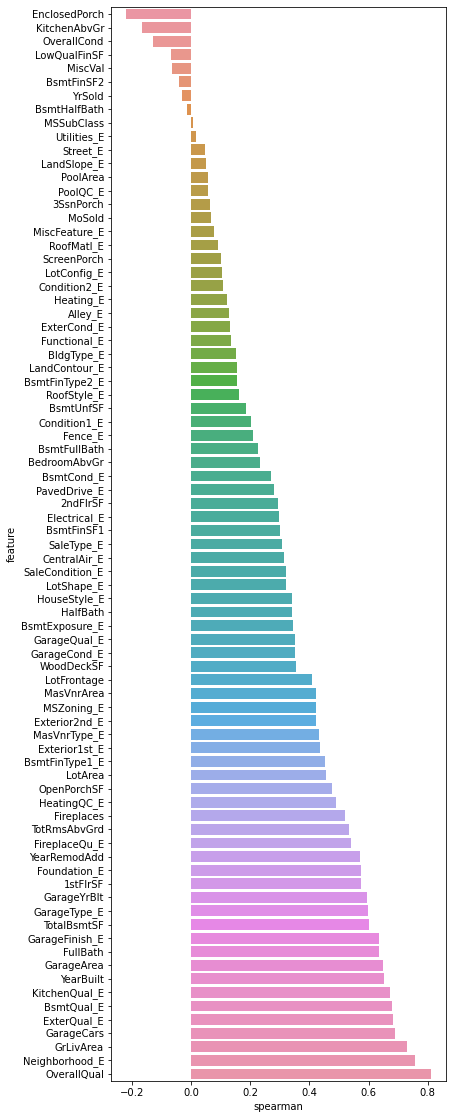

In [51]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    
features = quantitative_var + cat_var_encoded
spearman(train, features)

In [54]:
# Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear.
# (Pearson is for continuous variables)
# OverallQual is main criterion in establishing house price. 
# Neighborhood has big influence, partially it has some intrisinc value in itself, but also houses in certain regions tend to share same 
# characteristics (confunding) what causes similar valuations.

<AxesSubplot:>

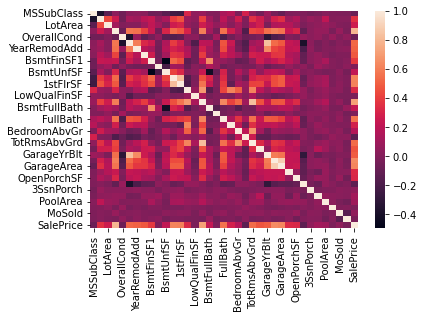

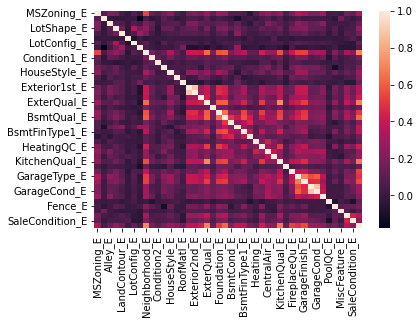

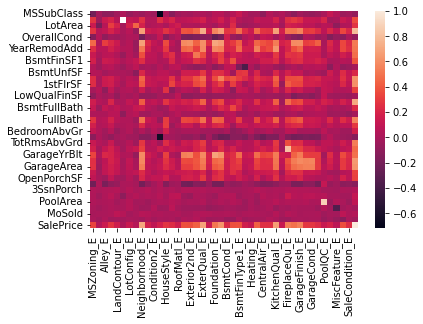

In [58]:
plt.figure(1)
corr = train[quantitative_var+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(2)
corr = train[cat_var_encoded+['SalePrice']].corr()
sns.heatmap(corr)
plt.figure(3)
corr = pd.DataFrame(np.zeros([len(quantitative_var)+1, len(cat_var_encoded)+1]), index=quantitative_var+['SalePrice'], columns=cat_var_encoded+['SalePrice'])
for q1 in quantitative_var+['SalePrice']:
    for q2 in cat_var_encoded+['SalePrice']:
        corr.loc[q1, q2] = train[q1].corr(train[q2])
sns.heatmap(corr)

### Pairplots

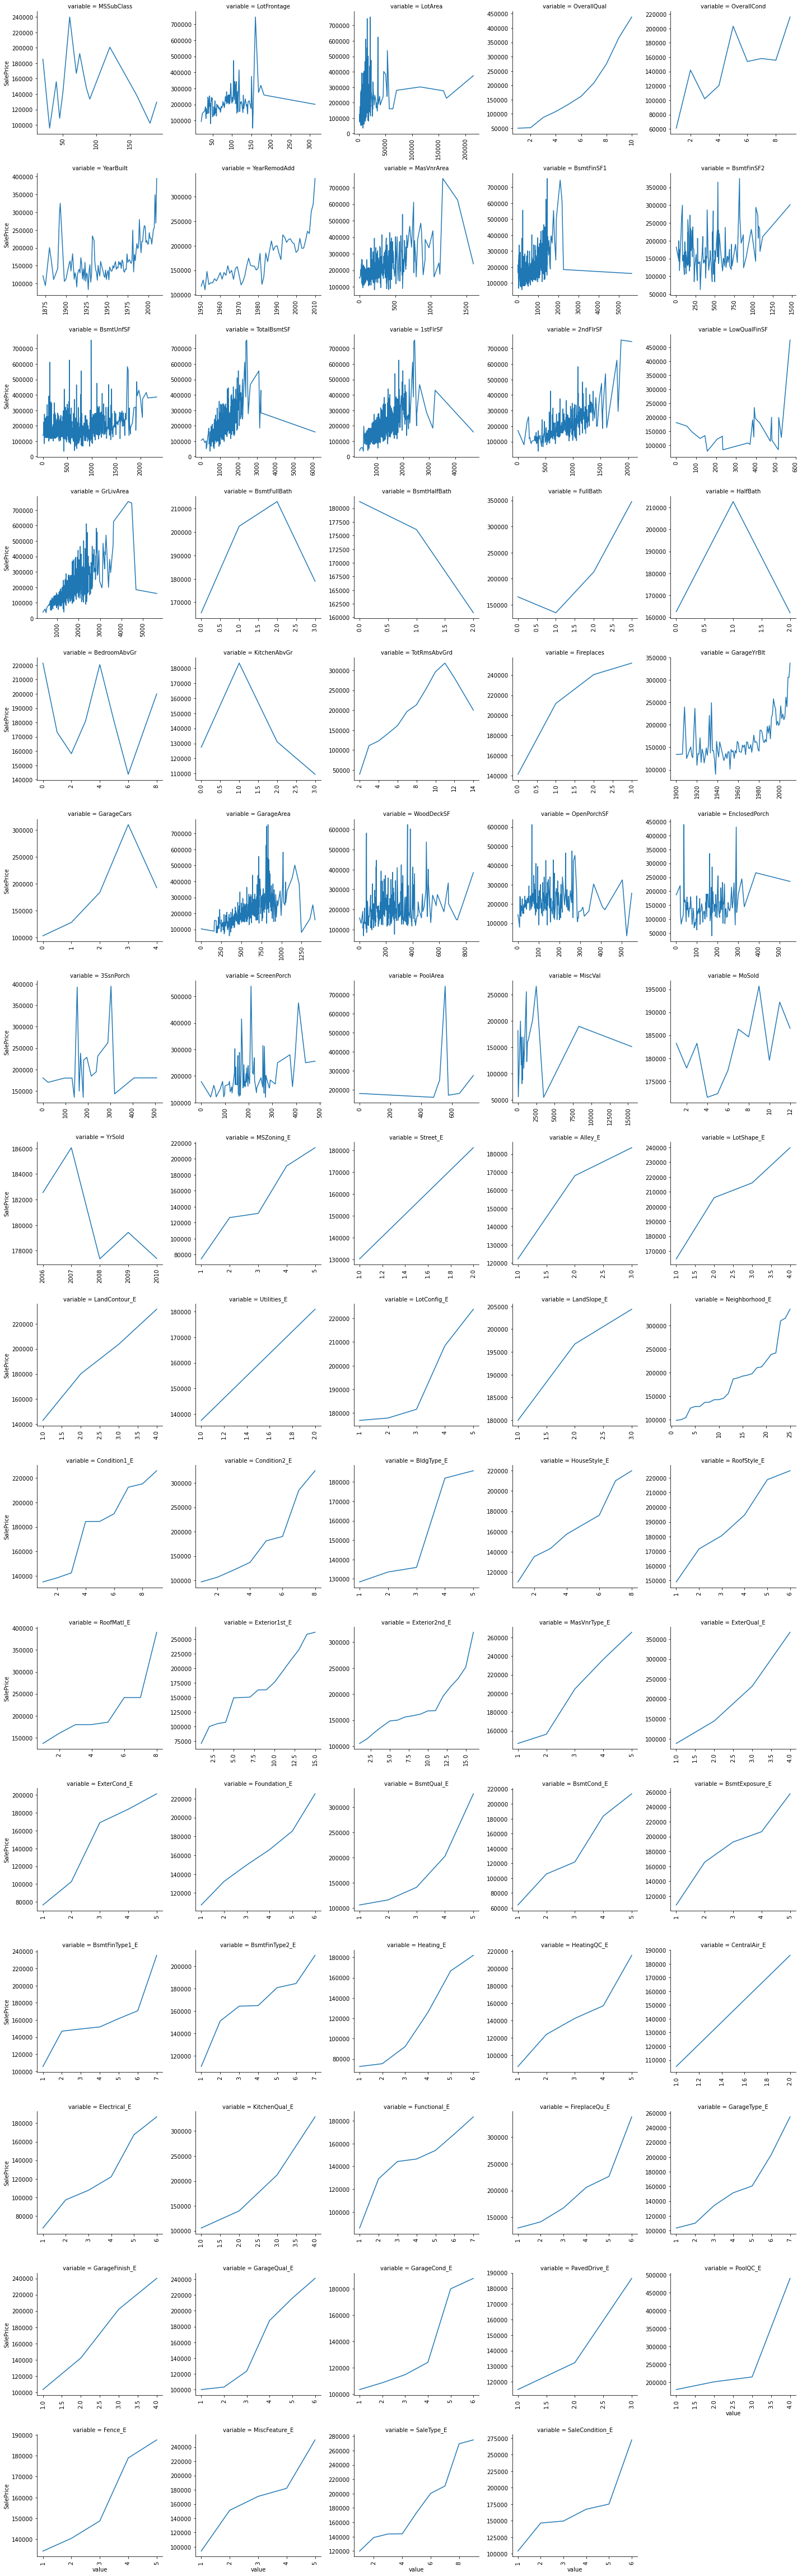

In [61]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)
    
f = pd.melt(train, id_vars=['SalePrice'], value_vars=quantitative_var+cat_var_encoded)
g = sns.FacetGrid(f, col="variable",  col_wrap=5, sharex=False, sharey=False, size=4)
g = g.map(pairplot, "value", "SalePrice")

In [63]:
# There are lots of nonlinearities this may be the cause why some variables wont be selected by Lasso/Lars. 
# Some factors like YearBuilt, 1stFlrSF, 2ndFlrSF, Neighborhood_E look like they would benefit from adding quadratic term to regression. 
# But on the other hand this will most probably provoke overfit.

# Price Segments

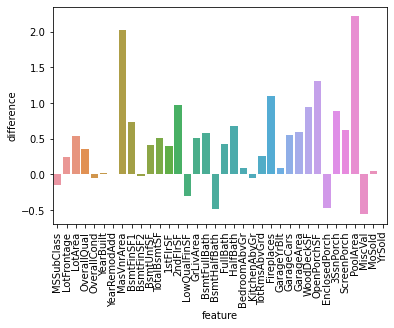

In [65]:
features = quantitative_var

standard = train[train['SalePrice'] < 200000]
pricey = train[train['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

In [86]:
# Here houses are divided in two price groups: cheap (under 200000) and expensive. 
# Then means of quantitative variables are compared. Expensive houses have pools, 
# better overall qual and condition, open porch and increased importance of MasVnrArea.

In [87]:
diff.sort_values(by=['difference'], ascending = False, inplace = True)
diff.head(5)

,feature,difference
32,PoolArea,2.213669
7,MasVnrArea,2.029480
28,OpenPorchSF,1.314906
23,Fireplaces,1.102258
13,2ndFlrSF,0.978444


### Clustering

0.7547019010256928


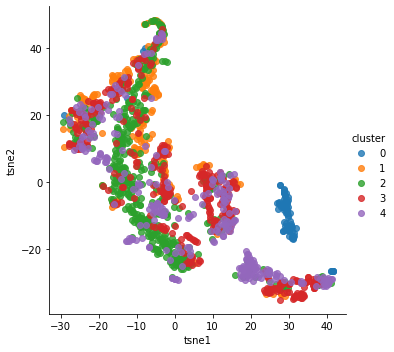

In [105]:
features = quantitative_var + cat_var_encoded
model = TSNE(n_components=2, random_state=0, perplexity=50)
X = train[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [106]:
# 30 First PCA Components explain 75% of variance. There seems to be some clustering present but it is not enough for segmented regression.

<AxesSubplot:ylabel='Density'>

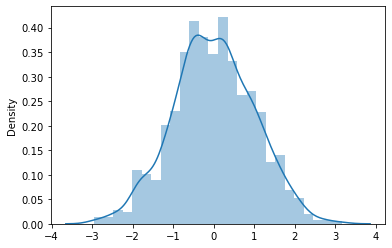

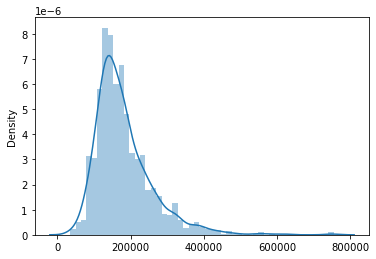

In [107]:
y = train['SalePrice'].values
def johnson(y):
    gamma, eta, epsilon, lbda = stats.johnsonsu.fit(y)
    yt = gamma + eta*np.arcsinh((y-epsilon)/lbda)
    return yt, gamma, eta, epsilon, lbda

def johnson_inverse(y, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((y-gamma)/eta) + epsilon

yt, g, et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.distplot(yt2)